# Deep Learning

## Part 1: Image Classification - CIFAR-10 (CNN)

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [1]:
# Install needed libraries
!pip install keras-tuner==1.4.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


## Access to code

In [2]:
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [3]:
# Load necessary libs and modules
from constants import *
from cnn import CNNTuner, CNN

## Load Dataset

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.cifar10.load_data()

num_classes = len(CIFAR_10_CLASS_IDS)
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

# Split the training data into training and validation sets (10% for validation)
train_X, validation_X, train_y, validation_y = train_test_split(
    train_X, train_y, test_size=0.1, random_state=42
)

# Ensure the splits are correctly made
print('Train Images:', train_X.shape)
print('Train Labels:', train_y.shape)
print('Validation Images:', validation_X.shape)
print('Validation Labels:', validation_y.shape)
print('Test Images:', test_X.shape)
print('Test Labels:', test_y.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train Images: (45000, 32, 32, 3)
Train Labels: (45000, 10)
Validation Images: (5000, 32, 32, 3)
Validation Labels: (5000, 10)
Test Images: (10000, 32, 32, 3)
Test Labels: (10000, 10)


### CNN Hyper-Parameter tuning

In [5]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
cifar_cnn_tuner = CNNTuner((train_X, train_y), (validation_X, validation_y),
                             tuner_directory, CIFAR_10_CNN_TUNER_PROJECT_NAME,
                             train_size=0.5)

In [6]:
cifar_cnn_keras_tuner = cifar_cnn_tuner.tune(epochs=10, batch_size=32)

Reloading Tuner from /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/tuners/cifar_10_cnn/tuner0.json


In [7]:
cifar_cnn_best_hyperparams = cifar_cnn_keras_tuner.get_best_hyperparameters()[0].values
cifar_cnn_best_hyperparams

{'kernel_size': 3,
 'kernel_stride': 1,
 'conv_filters': 96,
 'conv_activation': 'tanh',
 'num_layers': 1,
 'layer_0_kernel_size': 3,
 'layer_0_kernel_stride': 2,
 'layer_0_pool_size': 2,
 'layer_0_dropout': 0.25,
 'conv2dblock_0_filters': 32,
 'conv2dblock_0_activation': 'tanh',
 'dense_units': 192,
 'dense_dropout': 0.30000000000000004,
 'learning_rate': 0.0001,
 'layer_1_kernel_size': 3,
 'layer_1_kernel_stride': 2,
 'layer_1_pool_size': 2,
 'layer_1_dropout': 0.4,
 'conv2dblock_1_filters': 64,
 'conv2dblock_1_activation': 'tanh',
 'layer_2_kernel_size': 3,
 'layer_2_kernel_stride': 2,
 'layer_2_pool_size': 2,
 'layer_2_dropout': 0.30000000000000004,
 'conv2dblock_2_filters': 32,
 'conv2dblock_2_activation': 'tanh'}

In [8]:
cifar_cnn_keras_tuner.get_best_models()[0].summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_block (Conv2DBlock)           │ (None, 8, 8, 32)            │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 192)                 │         393,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,706 (1.62 MB)

 Trainable params: 425,706 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

### Fit the CNN

In [9]:
models_directory = os.path.join(base_path, MODELS_DIR)
cifar_cnn = CNN(models_dir=models_directory, weights_name=CIFAR_10_CNN_WEIGHTS,
                  class_ids=CIFAR_10_CLASS_IDS, class_labels=CIFAR_10_CLASS_LABELS)

In [10]:
cifar_cnn.fit(train_dataset=(train_X, train_y), validation_dataset=(validation_X, validation_y), hyperparams=cifar_cnn_best_hyperparams)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
 — val_f1: 0.453165 — val_precision: 0.457596 — val_recall: 0.458400

Epoch 1: val_f1 improved from -inf to 0.45317, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_cnn.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - categorical_accuracy: 0.2504 - loss: 2.0733 - val_categorical_accuracy: 0.4584 - val_loss: 1.5382 - val_f1: 0.4532 - val_recall: 0.4584 - val_precision: 0.4576
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 — val_f1: 0.502544 — val_precision: 0.504082 — val_recall: 0.507800

Epoch 2: val_f1 improved from 0.45317 to 0.50254, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_cnn.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - categorical_accuracy: 0.4326 - loss: 1.5731 - val_categorical_accuracy: 0.5078 - val_loss: 1.3809 - val_f1: 0.5025 - val_recall: 0.5078 - val_precision: 0.5041
Epoch 3/100
157/157 ━━━━━

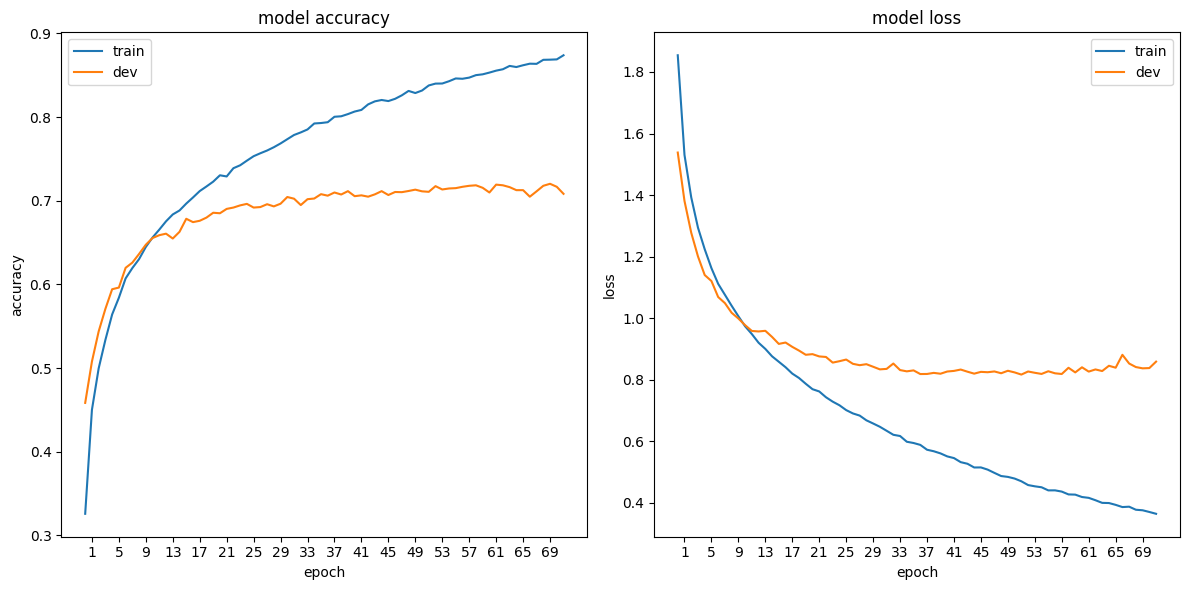

In [11]:
cifar_cnn.plot_curves()

### Evaluating the CNN on the training set (Classification Report)

In [12]:
train_classification_report_df, train_macro_average_df = cifar_cnn.classification_report((train_X, train_y))

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [13]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.951246,0.970380,0.960718,0.992685
1,1,automobile,0.991791,0.990472,0.991131,0.999199
2,2,bird,0.925347,0.939414,0.932327,0.983562
3,3,cat,0.940533,0.922046,0.931198,0.980316
4,4,deer,0.952317,0.942401,0.947333,0.987781
5,5,dog,0.944158,0.936388,0.940257,0.982895
6,6,frog,0.953879,0.980288,0.966903,0.995446
7,7,horse,0.984780,0.965264,0.974924,0.995797
8,8,ship,0.972985,0.985101,0.979006,0.997314
9,9,truck,0.992094,0.976000,0.983981,0.998178


In [14]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.960913,0.960775,0.960778,0.991317


### Evaluating the CNN on the validation set (Classification Report)

In [15]:
val_classification_report_df, val_macro_average_df = cifar_cnn.classification_report((validation_X, validation_y))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.755102,0.777311,0.766046,0.838281
1,1,automobile,0.821705,0.870637,0.845464,0.921763
2,2,bird,0.645833,0.647059,0.646445,0.729279
3,3,cat,0.538934,0.502868,0.520277,0.570164
4,4,deer,0.700000,0.662551,0.680761,0.750025
5,5,dog,0.576108,0.593254,0.584555,0.661531
6,6,frog,0.724074,0.806186,0.762927,0.864343
7,7,horse,0.793388,0.754420,0.773414,0.868157
8,8,ship,0.796578,0.833002,0.814383,0.908204
9,9,truck,0.853007,0.766000,0.807165,0.894946


In [17]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.720473,0.721329,0.720144,0.800669


### Evaluating the CNN on the test set (Classification Report)

In [18]:
test_classification_report_df, test_macro_average_df = cifar_cnn.classification_report((test_X, test_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [19]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.727695,0.783,0.754335,0.829052
1,1,automobile,0.808935,0.851,0.829435,0.909179
2,2,bird,0.612223,0.581,0.596203,0.672761
3,3,cat,0.540000,0.540,0.540000,0.581783
4,4,deer,0.683223,0.619,0.649528,0.723362
5,5,dog,0.599229,0.622,0.610402,0.670397
6,6,frog,0.725371,0.832,0.775035,0.869882
7,7,horse,0.803279,0.735,0.767624,0.858380
8,8,ship,0.834702,0.813,0.823708,0.905625
9,9,truck,0.828208,0.781,0.803911,0.881759


In [20]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.716287,0.7157,0.715018,0.790218
